### Lesson 8.9
---

In [3]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Import the train test split
# http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html


# Read in the data.
data = np.asarray(pd.read_csv('data_q.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# Use train test split to split your data 
# Use a test size of 25% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X,
                y,
                test_size=0.25,
                random_state=42)

# Instantiate your decision tree model
model = DecisionTreeClassifier()

# TODO: Fit the model to the training data.
model.fit(X_train, y_train)

# TODO: Make predictions on the test data
y_pred = model.predict(X_test)

# TODO: Calculate the accuracy and assign it to the variable acc on the test data.
acc = accuracy_score(y_test, y_pred)

In [4]:
acc

0.9583333333333334

Supplementary

In [1]:
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [2]:
from sklearn.metrics import accuracy_score

### Lesson 8.10
---

In [60]:
# Reading the csv file
import pandas as pd
data = pd.read_csv("data_q1.csv")

# Splitting the data into X and y
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Import statement for train_test_split
from sklearn.model_selection import train_test_split

# TODO: Use the train_test_split function to split the data into
# training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# The size of the testing set should be 20% of the total size of the data.
# Your output should contain 4 objects.

### Lesson 9.10
---

In [5]:
from sklearn.metrics import f1_score

In [6]:
F1 = 2 * (55.6 * 83.3) / (55.6 + 83.3)

In [7]:
F1

66.68797696184305

### Lesson 10.4
---

In [20]:
from sklearn.model_selection import KFold

In [24]:
X = np.array([[1,1,1,1], [2,2,2,2], [3,3,3,3], [4,4,4,4]])
y = np.array([1, 2, 3, 4])

In [26]:
kf = KFold(4,True,3)

In [27]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [28]:
X_train

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [4, 4, 4, 4]])

In [29]:
X_test

array([[3, 3, 3, 3]])

In [30]:
y_train

array([1, 2, 4])

In [31]:
y_test

array([3])

### Lesson 10.6
___

Detecting Overfitting and Underfitting with Learning Curves

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [64]:
from sklearn.model_selection import learning_curve

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

# ------------ [ Helper function for graphing Learning Curves] -------------- #
def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

In [55]:
df = pd.read_csv('data_q10_a.csv')

In [56]:
df.head()

,x1,x2,y
0,0.336494,-0.985951,-1.0
1,-0.011043,-0.105529,1.0
2,0.238160,-0.617417,1.0
3,-0.366783,-0.713819,1.0
4,1.221923,-1.039399,-1.0


In [57]:
X = np.array(df[['x1', 'x2']])

In [58]:
y = np.array(df['y'])

In [59]:
np.random.seed(55)

In [71]:
### Logistic Regression
#estimator = LogisticRegression()

### Decision Tree
estimator = GradientBoostingClassifier()

### Support Vector Machine
#estimator = SVC(kernel='rbf', gamma=1000)

To properly evaluate, be sure to flip the graph upside down since we are using _SCORE_ rather than _error_.

__LOGISTIC REGRESSION__

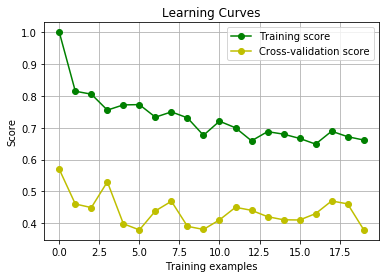

In [73]:
draw_learning_curves(X, y, LogisticRegression(), 20)

__DECISION TREE__

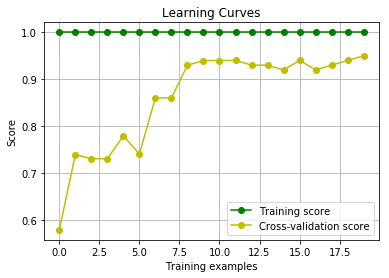

In [72]:
draw_learning_curves(X, y, estimator, 20)

__SUPPORT VECTOR MACHINE__

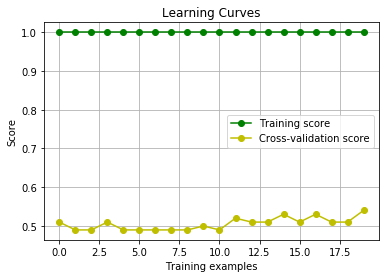

In [74]:
draw_learning_curves(X, y, SVC(kernel='rbf', gamma=1000), 20)

_Evaluation_

* The __logistic regression__ model has a low training and testing score;
   * UNDERFITTING
* The __decision tree__ model has a high training and test score;
    * GOOD
* The __support vector machine__ model has a high training score and a low testing score
    * OVERFITTING

#### GRID SEARCH in sklearn
---

* _kernel_: `poly` or `rbf`
* _C_: `0.1`, `1`, or `10`

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# select the parameters. 
# Form a dictionary.
parameters = {'kernel':['poly', 'rbf'], 'C':[0.1,1,10]}

# create a scorer
# We need to decide what metric we'll use to score each of the candidate models. In here, we'll use F1 Score.
scorer = make_scorer(f1_score)

# Create a GridSearch Object with the parameters, and the scorer. Use this object to fit the data
# create the object
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
# fit the data
grid_fit = grid_obj.fit(X,y)

# Get the best estimator
best_clf = grid_fit.best_estimator_

NameError: name 'clf' is not defined

---

# Improving a model with Grid Search

In this mini-lab, we'll fit a decision tree model to some sample data. This initial model will overfit heavily. Then we'll use Grid Search to find better parameters for this model, to reduce the overfitting.

First, some imports.

In [78]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Reading and plotting the data
Now, a function that will help us read the csv file, and plot the data.

/Users/richardscheiwe/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


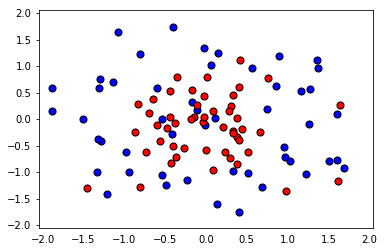

In [88]:
def load_pts(csv_name):
    data = np.asarray(pd.read_csv(csv_name, header=None))
    X = data[:,0:2]
    y = data[:,2]

    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    return X,y

X, y = load_pts('data_gridsearch.csv')
plt.show()

### 2. Splitting our data into training and testing sets

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

#Fixing a random seed
import random
random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Fitting a Decision Tree model

In [90]:
from sklearn.tree import DecisionTreeClassifier

# Define the model (with default hyperparameters)
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

Now let's plot the model and find the testing f1_score to see how we did.

The following function will help us plot the model.

In [91]:
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

/Users/richardscheiwe/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


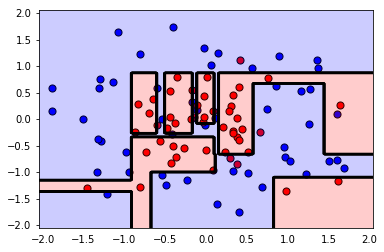

The Training F1 Score is 1.0
The Testing F1 Score is 0.7000000000000001


In [92]:
plot_model(X, y, clf)
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

Woah! Some heavy overfitting there. Not just from looking at the graph, __but also from looking at the difference between the high training score (1.0) and the low testing score (0.7)__. 

Let's see if we can find better hyperparameters for this model to do better. We'll use grid search for this.

### 4. (TODO) Use grid search to improve this model.

In here, we'll do the following steps:
1. First define some parameters to perform grid search on. We suggest to play with `max_depth`, `min_samples_leaf`, and `min_samples_split`.
2. Make a scorer for the model using `f1_score`.
3. Perform grid search on the classifier, using the parameters and the scorer.
4. Fit the data to the new classifier.
5. Plot the model and find the f1_score.
6. If the model is not much better, try changing the ranges for the parameters and fit it again.

**_Hint:_ If you're stuck and would like to see a working solution, check the solutions notebook in this same folder.**

The training F1 Score is 0.8148148148148148
The testing F1 Score is 0.8


/Users/richardscheiwe/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


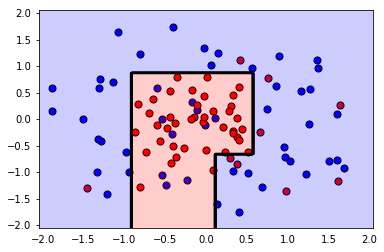

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [95]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune.
parameters = {'max_depth':[1,2,3,4,5], 
              'min_samples_leaf':[1,2,3,4,5], 
              'min_samples_split':[2,3,4,5]}

# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X,y)

# TODO: Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

# Plot the new model.
plot_model(X, y, best_clf)

# Let's also explore what parameters ended up being used in the new model.
best_clf

Note that by using GridSearch we improved the F1 Score from 0.7 to 0.8 (and we lost some training score, but this is ok). Also, if you look at the plot, the second model has a much simpler boundary, which implies that it's less likely to overfit.

